# Récupération et tri des stations disponibles

> Récupération des stations des réseaux `FR`, `RD`, et `G` disponibles pendant la période de COVID-19 débutant le **15 Février 2020**.

## Importation des modules

In [1]:
import matplotlib.pyplot as plt
import numpy as np
from seismic_noise import *

from obspy import UTCDateTime, read_inventory
from obspy.clients.fdsn import Client
from obspy.clients.fdsn.client import FDSNNoDataException

## Récupération des stations du territoire métropolitain

In [2]:
client = Client("RESIF")
tStart = UTCDateTime("2020-02-15")
tEnd = UTCDateTime("2021-06-30")
load_stations = False
st_file = "DATA/stations_fr.xml"

In [3]:
if load_stations:
    inventory = client.get_stations(network="FR,G,RD",
                                    location="00,,10",
                                    channel="EHZ,HHZ", # Eventuellement BHZ pour l'antarctique
                                    level="channel",
                                    starttime=tStart, endtime=tEnd,
                                    minlatitude=41, maxlatitude=52, minlongitude=-5, maxlongitude=10)
    inventory = inventory.remove(network="FR", station="STR", location="10", channel="HHZ")
    inventory = inventory.remove(network="FR", station="NIMR", location="10", channel="HHZ")
    inventory.write(st_file, format="STATIONXML")  

In [4]:
inventory = read_inventory(st_file)
inventory

Inventory created at 2021-07-07T21:21:43.000000Z
	Created by: RESIF WEB SERVICE: fdsnws-station | version: 1.1.1 
		    http://ws.resif.fr/fdsnws/station/1/query?starttime=2020-02-15T00%3...
	Sending institution: RESIF-SI (RESIF-DC)
	Contains:
		Networks (3):
			FR, G, RD
		Stations (163):
			FR.ABJF (Abjat-sur-Bandiat)
			FR.AGO (Saint-Agoulin)
			FR.AJAC (Ajaccio)
			FR.ARBF (technopole de l'Arbois)
			FR.ARTF (Artigues)
			FR.ATE (Arette)
			FR.BALS (Balsièges)
			FR.BANN (fort de Banne)
			FR.BARI (Barisis-aux-Bois)
			FR.BEGF (Béganne)
			FR.BESN (Besneville)
			FR.BETS (Betschdorf)
			FR.BIMF (Belle-Île-en-Mer)
			FR.BLAF (Les Blancs)
			FR.BOUC (Bouclans)
			FR.BOUF (Bouguenais)
			FR.BRGF (Bourganeuf)
			FR.BSCF (Bossay-sur-Claise)
			FR.BSTF (La Bastide-des-Jourdans)
			FR.CALF (plateau de Calern)
			FR.CAMF (Camaret-sur-Mer)
			FR.CARF (Carcanières)
			FR.CFF (63014, Aubière)
			FR.CHA2 (Chamrousse)
			FR.CHIF (Chizé)
			FR.CHLF (Chalmoux)
			FR.CHMF (Charmoille)
			FR.CIEL (

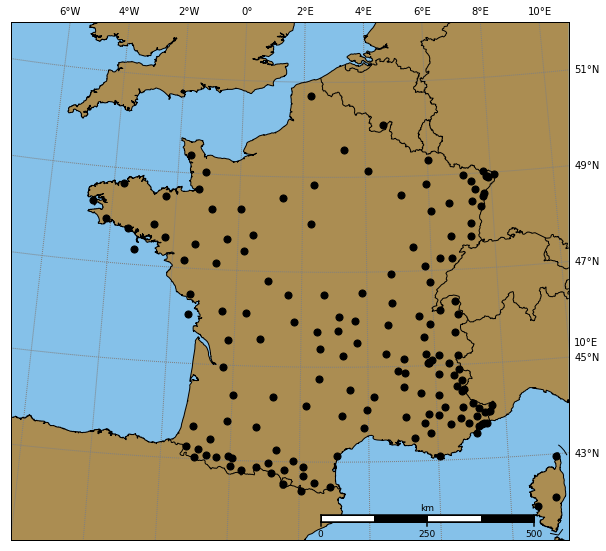

In [5]:
# Récupération des informations
lat = [ inventory.networks[j].stations[i].latitude for j in range(len(inventory.networks)) for i in range(len(inventory.networks[j].stations)) ]
lon = [ inventory.networks[j].stations[i].longitude for j in range(len(inventory.networks)) for i in range(len(inventory.networks[j].stations)) ]
code = inventory.get_contents()["channels"]
code_unique = []
for x in code:
    # check if exists in unique_list or not
    if x not in code_unique:
        code_unique.append(x)
code = code_unique

# Mise en graphique
plt.figure(figsize=(10,10))
m = create_map(latmin=41, latmax=52,
           lonmin=-6, lonmax=11,
           resol="h",
           style=None,
           bar_width = 500,
           bar_pos=4)

lon, lat  = m(lon, lat)
m.scatter(lon, lat, s=50, marker="o", zorder=20, color="black")

## Récupération des stations en Antarctique

In [6]:
client = Client("RESIF")
load_stations = False
st_file = "DATA/stations_antartctic.xml"

In [7]:
if load_stations:
    inventory = client.get_stations(network="G",
                                    station="CCD,DRV",
                                    location="00",
                                    channel="BHZ,EHZ,HHZ", # Eventuellement BHZ pour l'antarctique
                                    level="channel")
    inventory.write(st_file, format="STATIONXML")  

In [8]:
inventory = read_inventory(st_file)
inventory

Inventory created at 2021-07-07T21:12:19.000000Z
	Created by: RESIF WEB SERVICE: fdsnws-station | version: 1.1.1 
		    http://ws.resif.fr/fdsnws/station/1/query?network=G&station=CCD%2CD...
	Sending institution: RESIF-SI (RESIF-DC)
	Contains:
		Networks (1):
			G
		Stations (2):
			G.CCD (Concordia Base, Dome C, Antartica)
			G.DRV (Dumont d'Urville - Terre Adelie, Antarctica)
		Channels (6):
			G.CCD.00.BHZ (2x), G.DRV.00.BHZ (4x)

C:\Users\Flavien\anaconda3\envs\SeismicNoise\lib\site-packages\numpy\core\fromnumeric.py:3208: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  return asarray(a).size


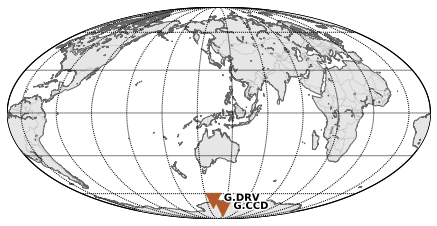

In [9]:
inventory.plot()
plt.show()

[123.305, 140.002069] [-75.1065, -66.664908]


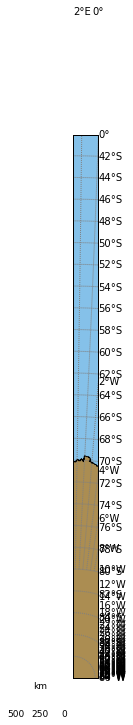

In [31]:
# Récupération des informations
lat = [ inventory.networks[j].stations[i].latitude for j in range(len(inventory.networks)) for i in range(len(inventory.networks[j].stations)) ]
lon = [ inventory.networks[j].stations[i].longitude for j in range(len(inventory.networks)) for i in range(len(inventory.networks[j].stations)) ]
print(lon, lat)
code = inventory.get_contents()["channels"]
code_unique = []
for x in code:
    # check if exists in unique_list or not
    if x not in code_unique:
        code_unique.append(x)
code = code_unique

# Mise en graphique
plt.figure(figsize=(10,10))
m = create_map(latmin=-90, latmax=-40,
           lonmin=50, lonmax=150,
           resol="h",
           style=None,
           bar_width = 500,
           bar_pos=4)

lon, lat  = m(lon, lat)
m.scatter(lon, lat, s=50, marker="o", zorder=20, color="black")